# 绘制PRD整体的气象要素贡献

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [3]:
filepath = datadir + 'Contribution/RandomForest_output/'
df = pd.read_excel(filepath + 'RF_PRD_forbar.xlsx', index_col=0,header=[0])
df

,low_all,low_diurnal,low_nocturnal,high_all,high_diurnal,high_nocturnal,diff_all,diff_diurnal,diff_nocturnal
SFC_TMP,0.354379,0.337177,0.115345,0.207883,0.350959,0.138281,0.131054,0.074602,0.200411
SOL_RAD,0.253978,0.110789,0.027982,0.410314,0.152822,0.016333,0.096511,0.090719,0.021609
RH,0.124206,0.147821,0.339176,0.112121,0.078406,0.322481,0.132651,0.117224,0.190976
PRES,0.041379,0.047169,0.098333,0.047976,0.048414,0.129243,0.153178,0.136160,0.163934
WSPD10,0.097416,0.131883,0.183409,0.072814,0.145901,0.127850,0.186521,0.229154,0.136101
WDIR10,0.066827,0.159575,0.095975,0.093074,0.173997,0.112423,0.185762,0.244760,0.126997
CloudFRAC,0.061814,0.065585,0.139780,0.055818,0.049501,0.153388,0.114322,0.107381,0.159971
mse,455.557984,468.713433,354.429456,363.551495,475.464899,388.672913,564.646222,605.149757,357.957841
r2,0.820165,0.658016,0.715748,0.826938,0.704583,0.644609,0.673721,0.666312,0.751692


In [4]:
variants = ['SFC_TMP', 'SOL_RAD', 'RH', 'PRES',
            'WSPD10', 'WDIR10', 'CloudFRAC']

df = df.loc[variants]

In [5]:
# 设置各要素对应的颜色
factor_color = {
    'SFC_TMP'  : '#ffbe7a',
    'SOL_RAD'  : '#e88482',
    'RH'       : '#82b0d2',
    'PRES'     : '#beb8dc',
    'WSPD10'   : '#45917c',
    'WDIR10'   : '#799a87',
    'CloudFRAC': '#c5b9a5'
}
custom_colors = [factor_color[factor] for factor in variants]

In [19]:
df_avg = (df['low_all'] + df['high_all'])/2
df_dif = (df['high_all'] - df['low_all'])

df_avg.sort_values(ascending=True, inplace=True)
df_dif.sort_values(ascending=True, inplace=True)

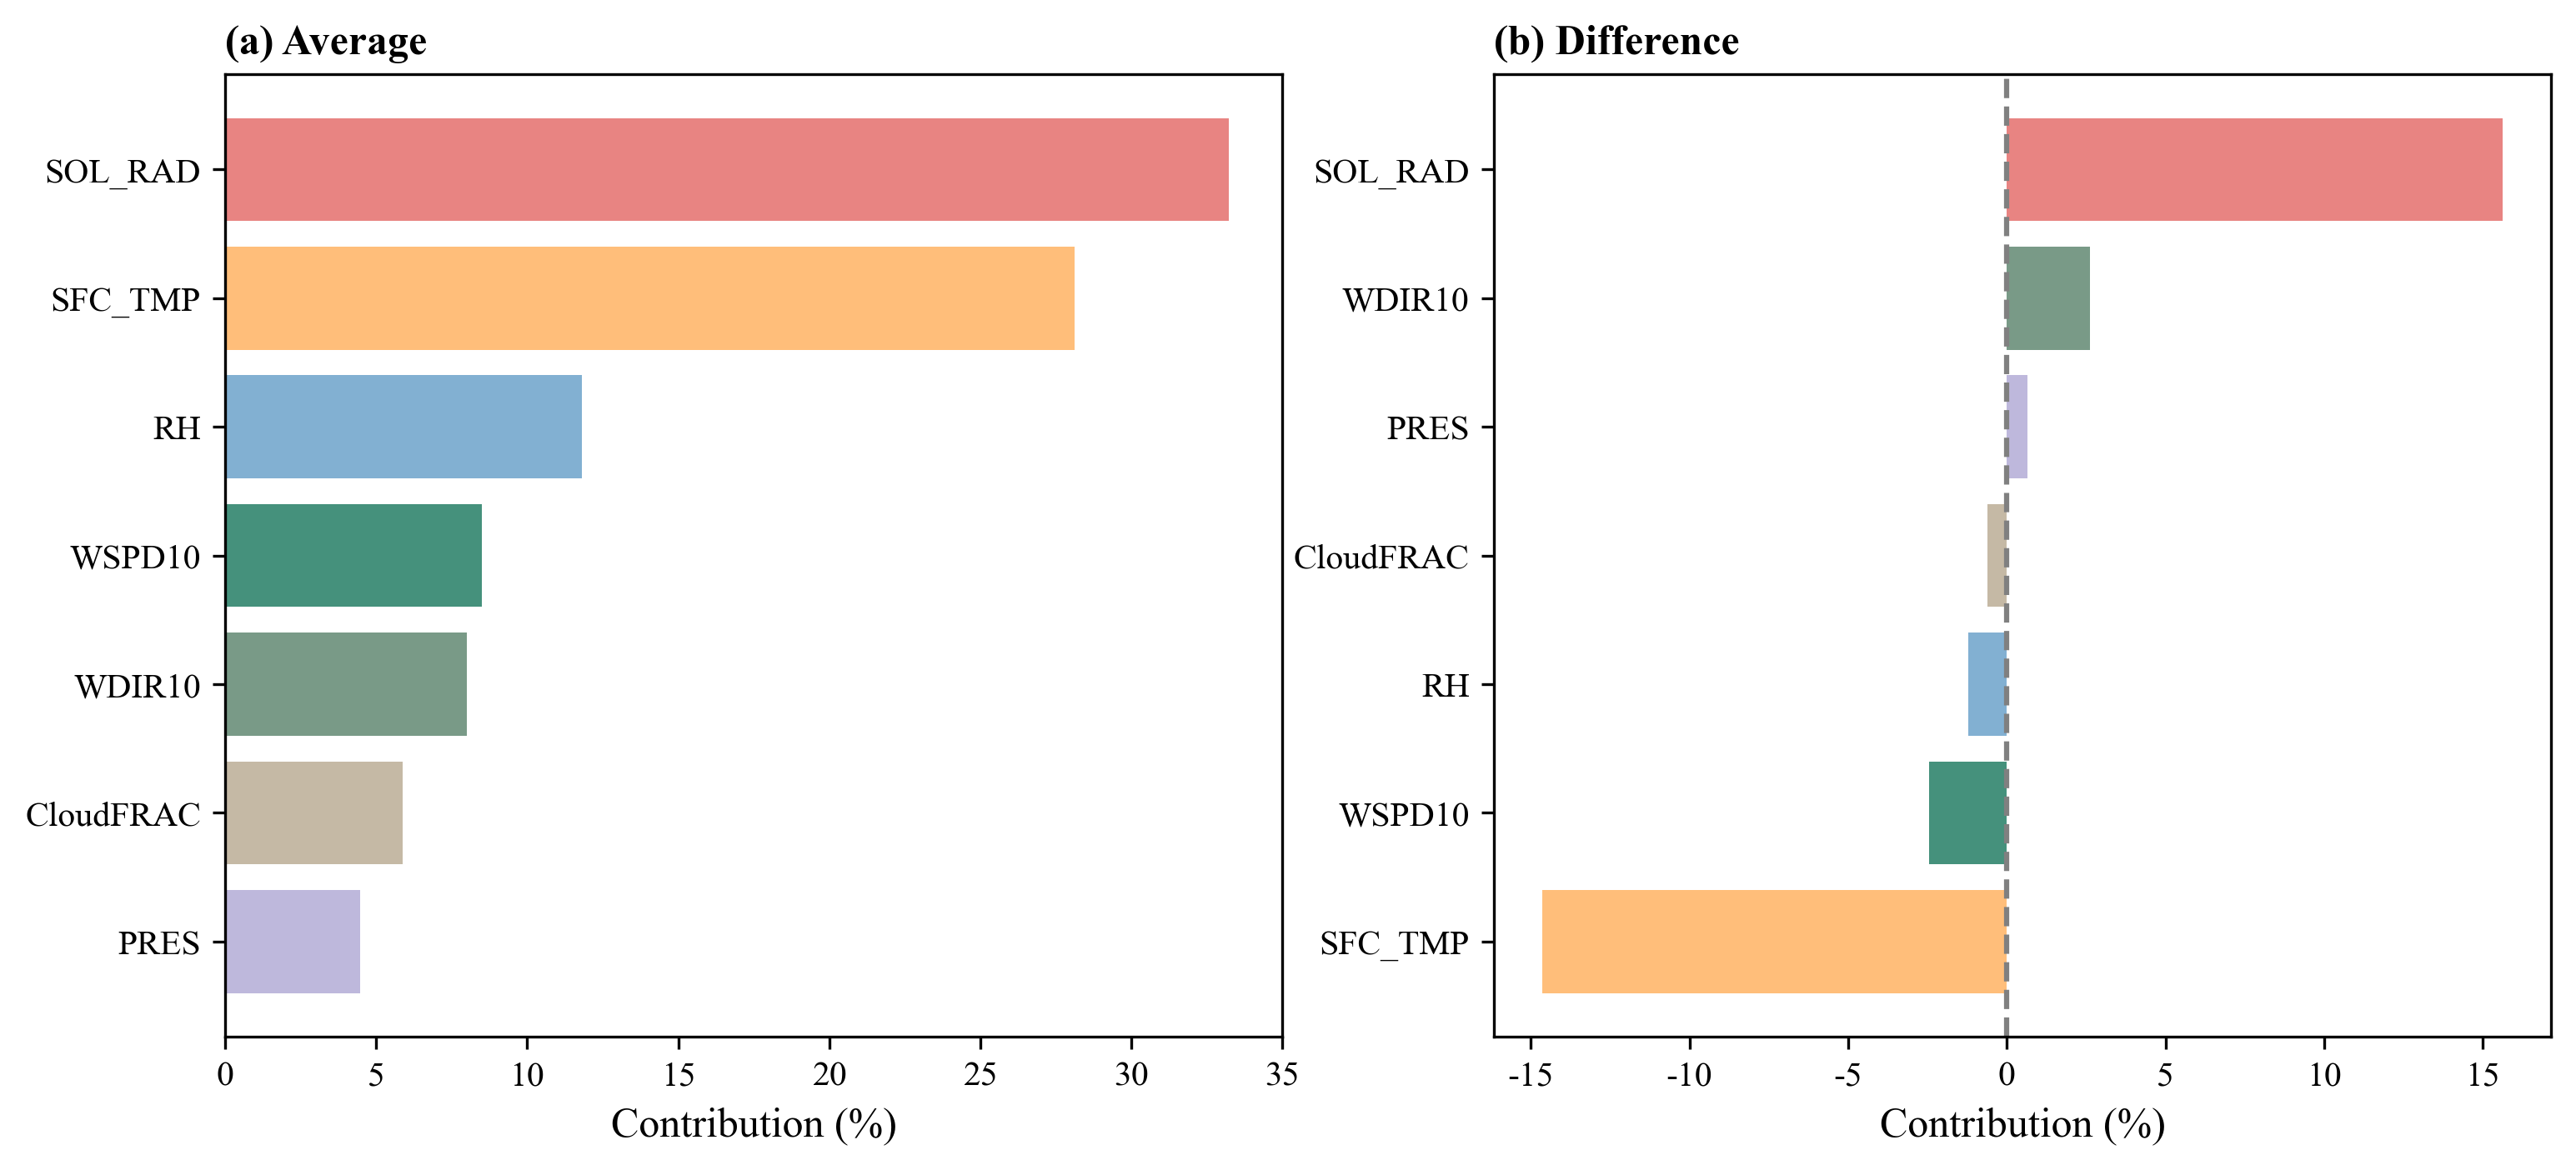

In [40]:
avg_colors = [factor_color[factor] for factor in df_avg.index]
dif_colors = [factor_color[factor] for factor in df_dif.index]

fig = plt.figure(figsize=(12, 5),dpi=300)
ax1,ax2 = fig.subplots(1,2)

ax1.barh(df_avg.index, df_avg, color=avg_colors)
xticks = np.arange(0, 0.36, 0.05)
ax1.set_xticks(xticks)
ax1.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks])

ax2.barh(df_dif.index, df_dif, color=dif_colors)
ax2.axvline(x=0, color='gray', linestyle='--')
xticks = np.arange(-0.15, 0.2, 0.05)
ax2.set_xticks(xticks)
ax2.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks])

ax1.set_xlabel('Contribution (%)', fontsize=12)
ax2.set_xlabel('Contribution (%)', fontsize=12)

title_dict={'fontsize':12,'fontweight':'bold','loc':'left'}
ax1.set_title('(a) Average',**title_dict)
ax2.set_title('(b) Difference',**title_dict)
plt.show()

## 把RH换成QV后

In [42]:
filepath = datadir + 'Contribution/RandomForest_output/RH_to_QV/'
df = pd.read_excel(filepath + 'RF_PRD.xlsx', index_col=0,header=[0])
df

,Low,High,Diff
SFC_TMP,0.367356,0.235718,0.111467
SOL_RAD,0.266486,0.413826,0.096897
QV,0.071245,0.093114,0.170130
PRES,0.040151,0.048674,0.152326
WSPD10,0.124236,0.070920,0.183333
WDIR10,0.064439,0.086384,0.181226
CloudFRAC,0.066086,0.051364,0.104621
mse,455.630420,362.643135,526.260537
r2,0.820136,0.827371,0.695902


In [43]:
variants = ['SFC_TMP', 'SOL_RAD', 'QV', 'PRES',
            'WSPD10', 'WDIR10', 'CloudFRAC']

df = df.loc[variants]

# 设置各要素对应的颜色
factor_color = {
    'SFC_TMP'  : '#ffbe7a',
    'SOL_RAD'  : '#e88482',
    'QV'       : '#82b0d2',
    'PRES'     : '#beb8dc',
    'WSPD10'   : '#45917c',
    'WDIR10'   : '#799a87',
    'CloudFRAC': '#c5b9a5'
}

In [45]:
df_avg = (df['Low'] + df['High'])/2
df_dif = (df['High'] - df['Low'])

df_avg.sort_values(ascending=True, inplace=True)
df_dif.sort_values(ascending=True, inplace=True)

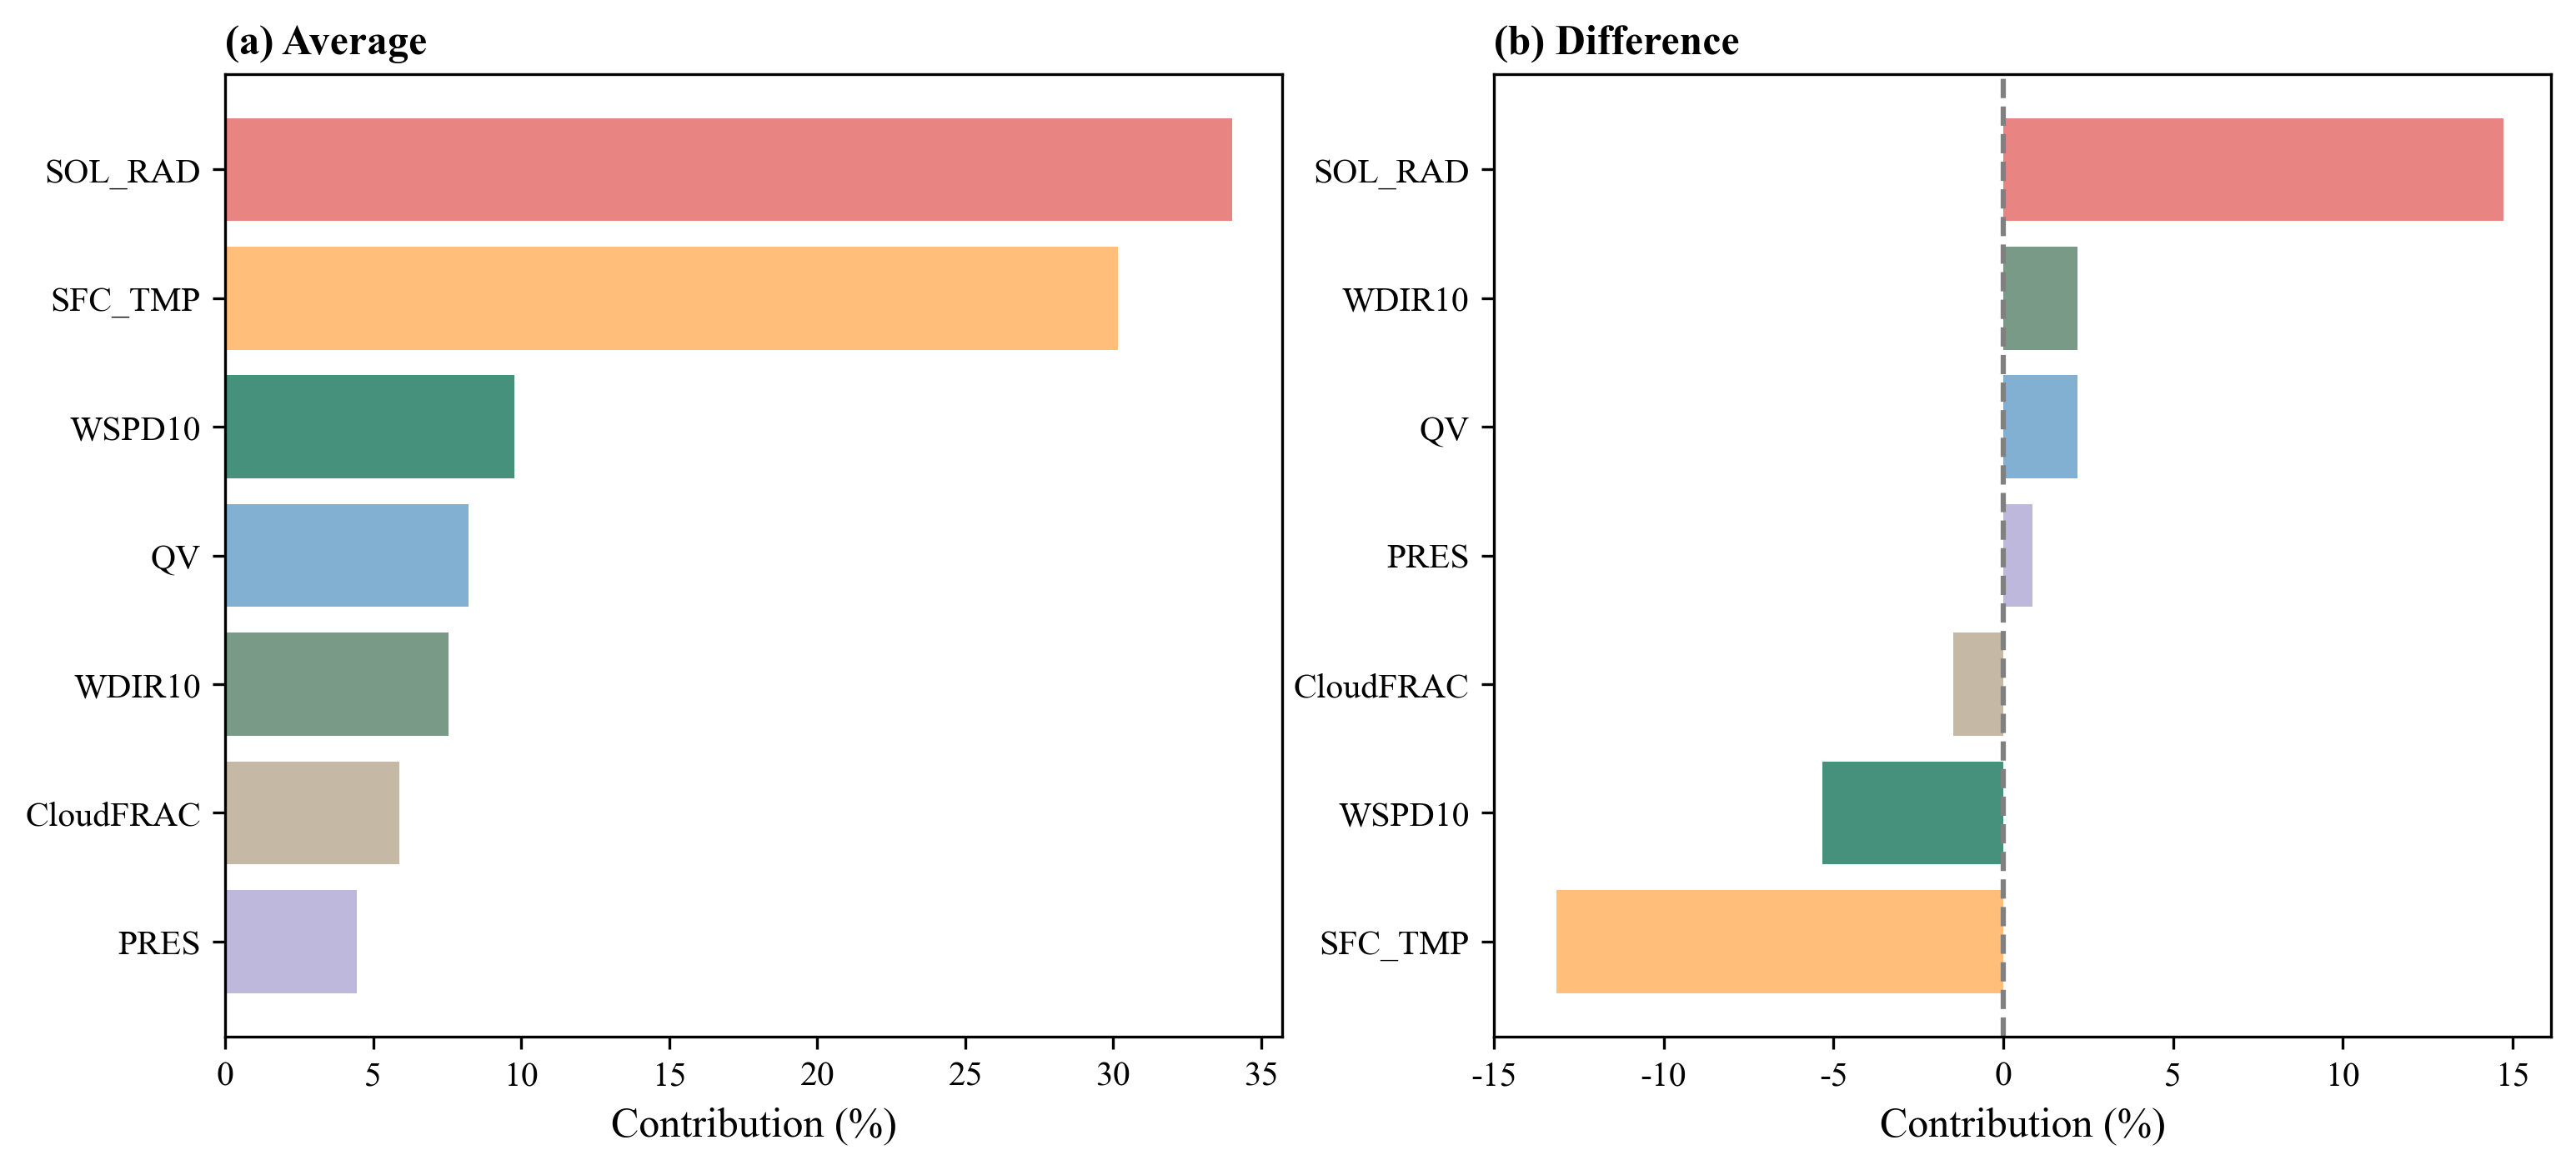

In [46]:
avg_colors = [factor_color[factor] for factor in df_avg.index]
dif_colors = [factor_color[factor] for factor in df_dif.index]

fig = plt.figure(figsize=(12, 5),dpi=300)
ax1,ax2 = fig.subplots(1,2)

ax1.barh(df_avg.index, df_avg, color=avg_colors)
xticks = np.arange(0, 0.36, 0.05)
ax1.set_xticks(xticks)
ax1.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks])

ax2.barh(df_dif.index, df_dif, color=dif_colors)
ax2.axvline(x=0, color='gray', linestyle='--')
xticks = np.arange(-0.15, 0.2, 0.05)
ax2.set_xticks(xticks)
ax2.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks])

ax1.set_xlabel('Contribution (%)', fontsize=12)
ax2.set_xlabel('Contribution (%)', fontsize=12)

title_dict={'fontsize':12,'fontweight':'bold','loc':'left'}
ax1.set_title('(a) Average',**title_dict)
ax2.set_title('(b) Difference',**title_dict)
plt.show()